<a href="https://colab.research.google.com/github/sbarry25/SuperMarioBros---RL/blob/main/SuperMarioBros_RLTraining.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# OUR AIM - TRAINING SUPER MARIO !

To use Reinforcent Learning to make mario automatically play the game. L-Lets go! 🍄

![](https://www.notebookcheck.net/fileadmin/Notebooks/News/_nc3/2DD297B4_9BA0_4828_A4A2_149A8A73AF52.png)

# INTRODUCTION TO OPEN AI GYM

OpenAi is an "Open source interface to reinforcement learning tasks.
The gym library provides an easy-to-use suite of reinforcement learning tasks." (https://gym.openai.com/)

Basically gives you multiple environments out of the box for you to train machine learning.

![](https://miro.medium.com/max/1318/1*ZHISh_zLYIlJPTq_6lX5LQ.png)

OpenAI Gym is a toolkit for developing and comparing reinforcement learning algorithms. It supports teaching agents everything from walking to playing games like pong or pinball. Gym is an open source interface to reinforcement learning tasks. Gym provides an environment and its is upto the developer to implement any reinforcement learning algorithms. Developers can write agent using existing numerical computation library, such as TensorFlow or Theano. (from : https://medium.com/@ashish_fagna/understanding-openai-gym-25c79c06eccb)

## Installing gym and nes py

In [ ]:
!pip install -q gym_super_mario_bros==7.3.0 nes_py

     |████████████████████████████████| 198 kB 29.8 MB/s 
     |████████████████████████████████| 77 kB 7.2 MB/s 
     |████████████████████████████████| 1.1 MB 51.1 MB/s 


## For rendering and display remotely on Colab notebook

Since you are using a remote server extra code needs to be added to render mario in your notebook itself.
https://stackoverflow.com/a/45179251

In [ ]:
!xvfb-run -s "-screen 0 1400x900x24" jupyter notebook

/bin/bash: xvfb-run: command not found


In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
from IPython import display

Lets create a function to render the game state in notebook.

In [ ]:
def show_state(env, step=0, info=""):
    plt.figure(3)
    plt.clf()
    plt.imshow(env.render(mode='rgb_array'))
    plt.title("Step: %d %s" % (step, info))
    plt.axis('off')

    display.clear_output(wait=True)
    display.display(plt.gcf())

# INITIAL RUN

### 1. lets import all the functions needed.

In [ ]:
import gym_super_mario_bros
from nes_py.wrappers import JoypadSpace

from gym_super_mario_bros.actions import SIMPLE_MOVEMENT

There are seven unique SIMPLE_MOVEMENT values.

In [ ]:
SIMPLE_MOVEMENT

[['NOOP'],
 ['right'],
 ['right', 'A'],
 ['right', 'B'],
 ['right', 'A', 'B'],
 ['A'],
 ['left']]

### 2. We need to initialise the environment.

In [ ]:
env = gym_super_mario_bros.make('SuperMarioBros-v0')

/usr/local/lib/python3.7/dist-packages/gym/envs/registration.py:594: UserWarning: WARN: The environment SuperMarioBros-v0 is out of date. You should consider upgrading to version `v3`.
  f"The environment {id} is out of date. You should consider "
/usr/local/lib/python3.7/dist-packages/gym/core.py:318: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  "Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future."
/usr/local/lib/python3.7/dist-packages/gym/wrappers/step_api_compatibility.py:40: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour i

### 3. Let environment know the input space.

In [ ]:
env = JoypadSpace(env, SIMPLE_MOVEMENT)

Lets examine the number of "observations" that can result in the enviroment.

In [ ]:
env.action_space

Discrete(7)

In [ ]:
env.observation_space.shape

(240, 256, 3)

### 4. Creating a simple loop for display.

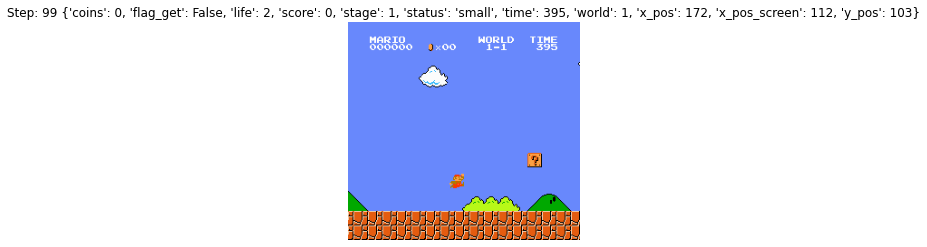

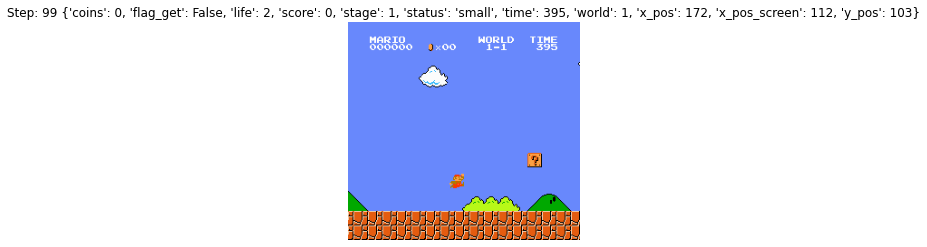

In [ ]:
done = True
for step in range(100):
    if done:
        env.reset()
    state, reward, done, info = env.step(env.action_space.sample())
    #print(state, reward, done, info)
    show_state(env,step,info)
#env.close()

### Mario is up and running. Yay!

`Note: if you uncomment the env.close() line you'll have to initialise environment again`


## Note on what we observe

Observations
If we ever want to do better than take random actions at each step, it’d probably be good to actually know what our actions are doing to the environment.

The environment’s step function returns exactly what we need. In fact, step returns four values. These are:

observation (object): an environment-specific object representing your observation of the environment. For example, pixel data from a camera, joint angles and joint velocities of a robot, or the board state in a board game.
reward (float): amount of reward achieved by the previous action. The scale varies between environments, but the goal is always to increase your total reward.
done (boolean): whether it’s time to reset the environment again. Most (but not all) tasks are divided up into well-defined episodes, and done being True indicates the episode has terminated. (For example, perhaps the pole tipped too far, or you lost your last life.)
info (dict): diagnostic information useful for debugging. It can sometimes be useful for learning (for example, it might contain the raw probabilities behind the environment’s last state change). However, official evaluations of your agent are not allowed to use this for learning.
This is just an implementation of the classic “agent-environment loop”. Each timestep, the agent chooses an action, and the environment returns an observation and a reward.


The process gets started by calling reset(), which returns an initial observation. So a more proper way of writing the previous code would be to respect the done flag. (https://gym.openai.com/docs/#environments)

# PREPROCESS ENVIRONMENT

Lets make our pipeline more efficient with some quality of life changes. Lets start by installing torch, torchvision, torchaudio. (It should be already installed in Colab but just to be sure).

![](https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQyrn8kARfzWOySc97OsBa4v_dncfeNxB3GCcZA9Ufssdy7PP1--9FM8W8tMVdyLMt3k3Y&usqp=CAU)

In [ ]:
#!pip install torch==1.10.1+cu113 torchvision==0.11.2+cu113 torchaudio===0.10.1+cu113
!pip install -q torch torchvision torchaudio

## Using Stable Baselines RL algorithms

Stable Baselines is a set of improved implementations of Reinforcement Learning (RL) algorithms based on OpenAI Baselines. Which is what we would be using here.

In [ ]:
!pip install -q stable-baselines3[extra]

     |████████████████████████████████| 170 kB 30.5 MB/s 
     |████████████████████████████████| 1.5 MB 56.0 MB/s 
     |████████████████████████████████| 1.6 MB 53.8 MB/s 
     |████████████████████████████████| 237 kB 68.4 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 51 kB 8.3 MB/s 


We use `GrayScaleObservation` to reduce the overhead of using color pictures while training.

In [ ]:
from gym.wrappers import GrayScaleObservation


### A note on VECTORIZED ENVIRONMENT in Stable Baselines

Vectorized Environments are a method for stacking multiple independent environments into a single environment. Instead of training an RL agent on 1 environment per step, it allows us to train it on n environments per step. Because of this, actions passed to the environment are now a vector (of dimension n). It is the same for observations, rewards and end of episode signals (dones). In the case of non-array observation spaces such as Dict or Tuple, where different sub-spaces may have different shapes, the sub-observations are vectors (of dimension n). (https://stable-baselines.readthedocs.io/en/master/guide/vec_envs.html)

In [ ]:
from stable_baselines3.common.vec_env import VecFrameStack, DummyVecEnv
#from matplotlib import pyplot as plt

Lets initialise the env with added parameters.

In [ ]:
# env = gym_super_mario_bros.make('SuperMarioBros-v0')
# env = JoypadSpace(env, SIMPLE_MOVEMENT)
env = GrayScaleObservation(env, keep_dim=True)
env = DummyVecEnv([lambda: env])
env = VecFrameStack(env, 4, channels_order='last')

Starting from scratch with `env.reset()`.

In [ ]:
state = env.reset()

In [ ]:
state, reward, done, info = env.step([5])

### Displaying sample input

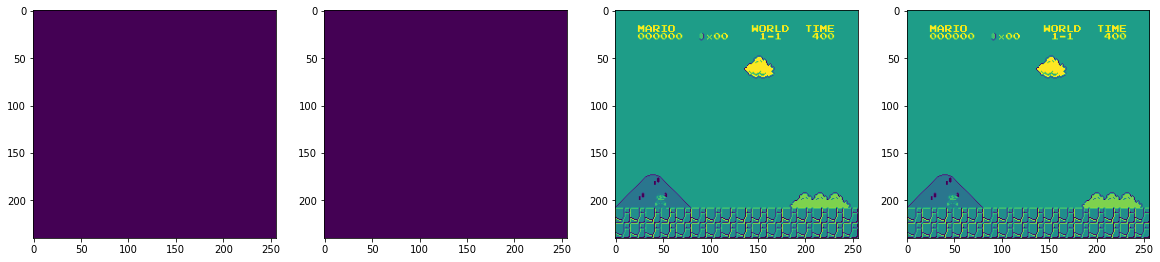

In [ ]:
plt.figure(figsize=(20,16))
for idx in range(state.shape[3]):
    plt.subplot(1,4,idx+1)
    plt.imshow(state[0][:,:,idx])
plt.show()

This is the sample game state world we are going to work with.

# TRAINING THE RL MODEL

Its training time. 

![](https://giffiles.alphacoders.com/260/2600.gif)

In [ ]:
import os
from stable_baselines3 import PPO
from stable_baselines3.common.callbacks import BaseCallback

PPO stands for proximal policy optimisation. Read more it here: https://arxiv.org/abs/1707.06347

In [ ]:
class TrainAndLoggingCallback(BaseCallback):
    
    def __init__(self, check_freq, save_path, verbose=1):
        super(TrainAndLoggingCallback, self).__init__(verbose)
        self.check_freq = check_freq
        self.save_path = save_path
    
    def _init_callback(self):
        if self.save_path is not None:
            os.makedirs(self.save_path, exist_ok=True)
    
    def _on_step(self):
        if self.n_calls % self.check_freq == 0:
            model_path = os.path.join(self.save_path, 'best_model_{}'.format(self.n_calls))
            self.model.save(model_path)
        return True

### Note on Callbacks
A callback is a set of functions that will be called at given stages of the training procedure. You can use callbacks to access internal state of the RL model during training. It allows one to do monitoring, auto saving, model manipulation, progress bars, 

In [ ]:
CHECKPOINT_DIR = './train/'
LOG_DIR = './logs/'

## IMPORTANT

### If you increase the `check_freq` value you will get better result. but it takes more time. So its a question of how much time you have.
For quick demostration sake I am keeping it low.

In [ ]:
check_freq = 100
#check_freq = 100000

### 1. Defining callback

In [ ]:
callback = TrainAndLoggingCallback(check_freq=check_freq, save_path=CHECKPOINT_DIR)

### 2. Initialising the PPO model.

In [ ]:
model = PPO('CnnPolicy', env, verbose=1, tensorboard_log=LOG_DIR, learning_rate=0.000001, n_steps=512)

Using cuda device
Wrapping the env in a VecTransposeImage.


### 3. Learning

In [ ]:
model.learn(total_timesteps=check_freq, callback=callback)

Logging to ./logs/PPO_1


/usr/local/lib/python3.7/dist-packages/gym_super_mario_bros/smb_env.py:148: RuntimeWarning: overflow encountered in ubyte_scalars
  return (self.ram[0x86] - self.ram[0x071c]) % 256


----------------------------
| time/              |     |
|    fps             | 29  |
|    iterations      | 1   |
|    time_elapsed    | 17  |
|    total_timesteps | 512 |
----------------------------


In [ ]:
model.save('astatemodel')

## TEST IT OUT

Here is how you test the algorithm.

In [ ]:
model = PPO.load('./astatemodel')
#model = PPO.load('./train/best_model_10000')

In [ ]:
state = env.reset()

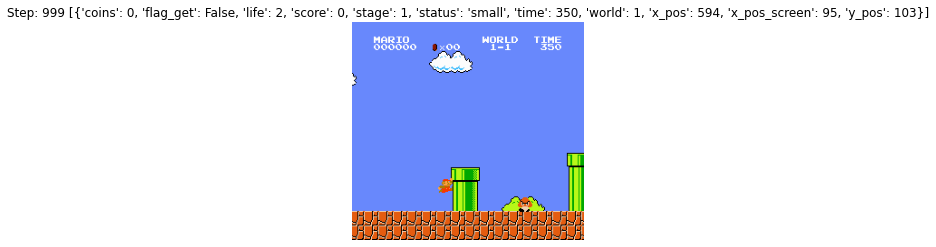

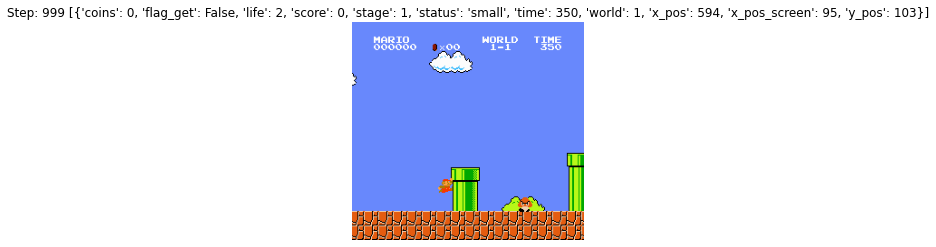

In [ ]:
state = env.reset()

#for step in range(10000):
for step in range(1000):
    if done:
        env.reset()
    action, _ = model.predict(state)
    state, reward, done, info = env.step(action)
    #print(state, reward, done, info)
    show_state(env,step,info)
#env.close()

### NOTE: 
1. Youll notice that on lower values of check_freq mario doesn't even know that he needs to get big inorder to jump over the first pipe.
2. Try increasing the check_freq value after initial run, more the value better trained our mario.

Thank you for reading!

![](https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQxZPsJQ5H4SXIUa5uekV-HQZyjpRMmlmmArQ&usqp=CAU)